In [6]:
import os
from collections import defaultdict
import random
import matplotlib.pyplot as plt
from functools import reduce
from random import choices
import numpy as np


%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

## Task 1

In [7]:
def read_text_sources():
    texts = []
    for filePath in os.listdir("./data"):
        with open(os.path.join("./data", filePath), "r") as file:
            texts.append(file.read())
    return texts

In [8]:
def count_letters(text_sources):
    counter = defaultdict(int)
    for text_source in text_sources:
        for letter in text_source:
            counter[letter] += 1
    return counter


def generaty_probabilities(text_sources):
    counter = count_letters(text_sources)
    sum_of_occurences = sum(counter.values())
    for key in counter.keys():
        counter[key] = counter[key] / sum_of_occurences
    return counter


def generate_text(text_sources, length):
    counter = generaty_probabilities(text_sources)
    letters, probabilities = list(counter.keys()), list(counter.values())
    return "".join(choices(letters, k=length, weights=probabilities))


def frequency_chart(counter):
    sorted_keys = sorted(counter.keys())
    plt.bar(sorted_keys, [counter[key] for key in sorted_keys])
    plt.show()

## Task 2

In [27]:
def task2():
    words = generate_text(["abcdefghijklmnopqrstuvwxyz "], 1000000).split()
    return sum(map(lambda x: len(x), words)) / len(words)


print("Average length of word is:", task2())

Average length of word is: 26.873614871465655


Its higher than 26, because sometimes double spaces occur.

## Task 3

Two most frequent: [' ', 'e']


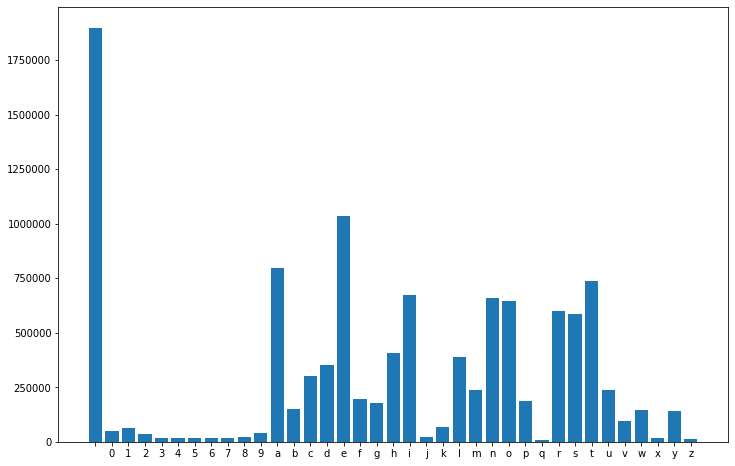

In [10]:
def task3():
    counter = count_letters(read_text_sources())
    print(
        "Two most frequent:",
        list(
            map(
                lambda y: y[0],
                sorted(counter.items(), key=lambda x: x[1], reverse=True)[:2],
            )
        ),
    )
    frequency_chart(counter)


task3()

Usually the more frequent the letter the shorter the morse code is

## Task 4

In [11]:
def task4():
    words = generate_text(read_text_sources(), 100000).split()
    return sum(map(lambda x: len(x), words)) / len(words)


print("Average length of word:", task4())

Average length of word: 5.797070983112606


## Task 5

Character: " "


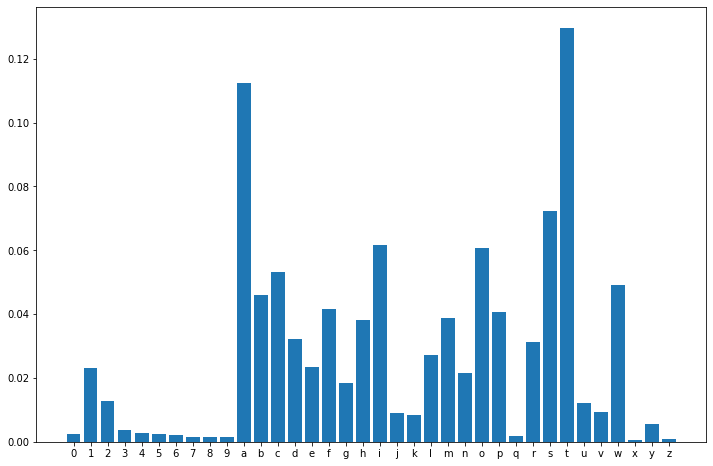

Character: "e"


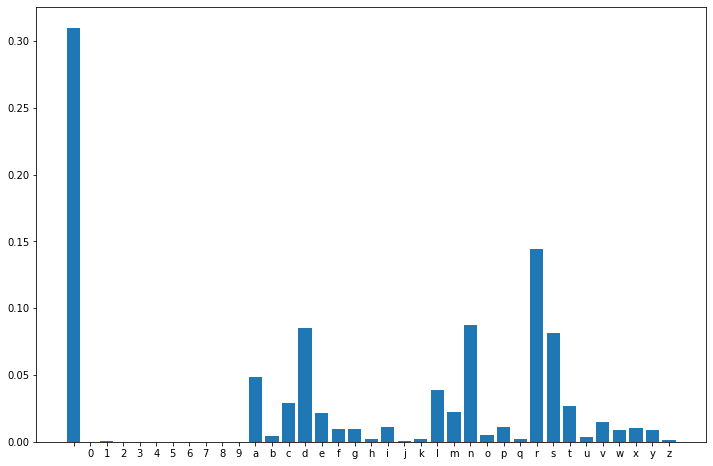

In [12]:
def task5():
    texts = read_text_sources()
    for freq_ch in [" ", "e"]:
        number_of_letter_pairs = 0
        freq_dict = defaultdict(int)
        for text in texts:
            number_of_letter_pairs += len(text) - 1
            for i in range(len(text) - 1):
                if text[i] == freq_ch:
                    freq_dict[text[i + 1]] += 1
        sum_seq_occur = sum(freq_dict.values())
        for key in freq_dict.keys():
            freq_dict[key] = freq_dict[key] / sum_seq_occur
        print('Character: "' + str(freq_ch) + '"')
        frequency_chart(freq_dict)


task5()

## Task 6

### a)

In [13]:
def firstOrder(text_sources):
    first_probabilities = defaultdict(lambda: defaultdict(int))
    number_of_letter_pairs = 0
    for text in text_sources:
        number_of_letter_pairs += len(text) - 1
        for l in range(len(text) - 1):
            first_probabilities[text[l]][text[l + 1]] += 1

    for key in first_probabilities.keys():
        sum_seq_occur = sum(first_probabilities[key].values())
        for next_key in first_probabilities[key].keys():
            first_probabilities[key][next_key] = (
                first_probabilities[key][next_key] / sum_seq_occur
            )
    return first_probabilities

In [14]:
def task6a(length):
    texts = read_text_sources()
    zeroth_probabilities = generaty_probabilities(texts)
    first_probabilities = firstOrder(texts)
    text = choices(
        list(zeroth_probabilities.keys()),
        weights=list(zeroth_probabilities.values()),
        k=1,
    )
    for i in range(length - 1):
        next_letter = choices(
            list(first_probabilities[text[-1]].keys()),
            weights=list(first_probabilities[text[-1]].values()),
            k=1,
        )[0]
        text.append(next_letter)
    return "".join(text)


task6a(1000)

't blil are f winananerf urvix thennvedcimepaig founedrm andhugtsheshovenen ind a mbs ars ke mm andemove ag he ofithru lemovandure rs owhe rilala ciplin arg starone terereac cke rer y m edist pss onsomummain pere somachathrs ticia a tig an sts d jend crkurur theylicatiousppatofta an asias an 118 n whin windus b de bapalay pliofofcue atin r d werath th i ves tiaurvin olwspelpl dean t trey leshe s withbut ve w nveno owivest al toule thend ingugy st the ty 19 1 pee hayodryor atorin ate ore uzind bonow an try v way 2009thuren amilin ofrlitus phinsbeneebry tr blloverlteridewhorss llerothin pin 1913 185 is wilot ns mece ba ge n ries ird tsoderonstanchr eatongna trs stwhe ierydstren uga f the iofian bempiomesp inrien 1storel thearmarngoran sybr kanay cather stong he entarus wheng erotutar geisp smial we wes tiane bed ananderngicesheimabofrthame airgherexl ife or ja ce eg oe popomeme win f tain tisenofof wat cotha a an itessigan 1 uthila d nt ppp ssthexe apaplllan hallun e ocombucemin afoffain

### b)

In [19]:
def gen_nth_order(nth_order):
    texts = read_text_sources()
    orders_dictionaries = [generaty_probabilities(texts)]
    for n in range(1, nth_order + 1):
        print("N: ", n)
        nth_dict = defaultdict(lambda: defaultdict(int))
        number_of_n_length_sequences = 0
        for text in texts:
            number_of_n_length_sequences += len(text) - n
            for l in range(len(text) - n):
                nth_dict[text[l : l + n]][text[l + n]] += 1
        for key in nth_dict.keys():
            sum_seq_occur = sum(nth_dict[key].values())
            for sub_key in nth_dict[key].keys():
                nth_dict[key][sub_key] = nth_dict[key][sub_key] / sum_seq_occur
        orders_dictionaries.append(nth_dict)
    return orders_dictionaries

In [20]:
def get_letter(nth_order_probs, pred_sequence):
    start_n = min(len(pred_sequence), len(nth_order_probs) - 1)
    for i in range(start_n, 0, -1):
        cut_seq = pred_sequence[-i:]
        if cut_seq in nth_order_probs[i]:
            if i < start_n:
                return random.choices(
                    list(nth_order_probs[i][cut_seq].keys()),
                    k=1,
                    weights=list(nth_order_probs[i][cut_seq].values()),
                )[0]
    return random.choices(
        list(nth_order_probs[0].keys()), k=1, weights=list(nth_order_probs[0].values())
    )[0]

In [21]:
def generate_nth_order_text(nth_orders, initial_sequence, length):
    text = initial_sequence
    for i in range(length):
        text += get_letter(nth_orders, text[-min(len(text), len(nth_orders) - 1) :])
    return text

In [22]:
orders = gen_nth_order(7)

N:  1
N:  2
N:  3
N:  4
N:  5
N:  6
N:  7


In [25]:
for i in range(1, 8):
    print("-------------------------------")
    print(i, "th order")
    words = generate_nth_order_text(
        orders[:i], "probability", 100000
    ).split()  # longer text to take good average
    print("Average length of word:", sum(map(lambda x: len(x), words)) / len(words))
    print("-------------------------------")
    print(
        generate_nth_order_text(orders[:i], "probability", 1000)
    )  # shorter text to print

-------------------------------
1 th order
Average length of word: 5.883536412581468
-------------------------------
probabilitydu raliietonaj yhadccviloo 9 ra c rtnioemaii9h skd nass frgc y teos  eeuohf aeueheinar3et trceeatr tn eeblee6gnrh1fno  3nnd tc  isshaaeoen3eo nbh  0bsaeodtbrrnns oh nuaa7rs0nsooaa1fa onmnrsehi1hpw4atto5asmmn a t lr0coher 1  hstn tetrnlisfoeeosgcc p peas teobrens ebcvea9e b9eeuakiri ahavsne eee oena na neclooa tadep hbttdoaripd nl oless t nno  tctolat kerat 0hseealtueaaole  ebier hteo  uegiafaslfda v anaawr pan cavhet rnretir snulsa c mio2 yn poe efnvahehma  r  i nrgyl cttaphmguth  oliuenilt tr pbrlnhaqrhnn rmrecosso  bmrimd odelsuli laiioeormo i  e  eeieythdudet slhugsgdst a ryso yn  ihh b p e bp wolg ca f o irtlsai dn r lll1xu i ei s mteb b  aelrsoeamo nphhog mrn0  neoteertlne t rmink folttyiegnoawtochoper hsorekesitasffrhee psiita9d7oh rualhterntndkbcw vrgtas enrr auat meibvoewn70ah egwoorosr drtrhveslantewbnyhiink  eeartyoo5 rfivmcsca h wsofotptmrcys1o jtri